In [1135]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
import fileinput
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from scipy.stats.mstats import winsorize


import warnings
warnings.filterwarnings("ignore")

In [1136]:
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Customer_Data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [1137]:
df.shape

(8950, 18)

In [1138]:
df.columns = df.columns.str.lower()

In [1139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [1140]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## PART 1 - Data Preprocessing

For this section, our goal is to clean the data and correct any potential Null values or statistical anomolies as well as handle potential outliers that may affect our segmentation.
- Standardization will most likely be neccessary to handle outliers that that may skew our clustering
    - Will implemenent Principle Component Analysis to :
        - further reduce any potential noise and redundency our dataset may have
        - Deal with multicollinearity with our dataset to prevent distortion between clusters

In [1141]:
#Mistake in cash_advance_frequency where max is 1.5, remapped to 1 as the user is a frequent cash advance credit card user
df[df['cash_advance_frequency'] > 1]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
681,C10708,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,C11680,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,C12629,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,C12684,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,C13127,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,C13347,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,C18273,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,C18588,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7


In [1142]:
#Standardize all users to frequent max scale 1

df['cash_advance_frequency'] = np.where(df['cash_advance_frequency'] > 1, 1, df['cash_advance_frequency'])
df[df['cash_advance_frequency'] > 1]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure


Checking if frequency scores are consistent given the tenure of the credit card user. Have to keep in mind the dataset is only capturing a 6 month period. Some users have a far longer tenure and therefore frequency may be skewed.

In [1143]:
#Checking if frequency scores are consistent given the tenure of the credit card user, s
df[df['cash_advance_trx'] == 0]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.00,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.00,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.0,1.000000,1.000000,1.000000,0.0,0,64,13500.0,6354.314328,198.065894,1.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.0,0.166667,0.166667,0.000000,0.0,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.0,0.333333,0.333333,0.000000,0.0,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,275.861322,NaN,0.00,6


Thinking purchases and cash advance frequencies can be scaled to percentile

In [1144]:
# Only Minimum Payments have a large amount of null values, its less than 3% of the data, going to drop the data
df.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [1145]:
#Checking to see significance of null values, Maybe they have no values because they pay their bills earlier where they dont get a minimum payment
df[df['minimum_payments'].isna()]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [1146]:
#Dropped customer ID Variable
df.drop('cust_id', axis=1, inplace=True)
df

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [1147]:
#Turning all null values to 0's
df.dropna(inplace=True)
df.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

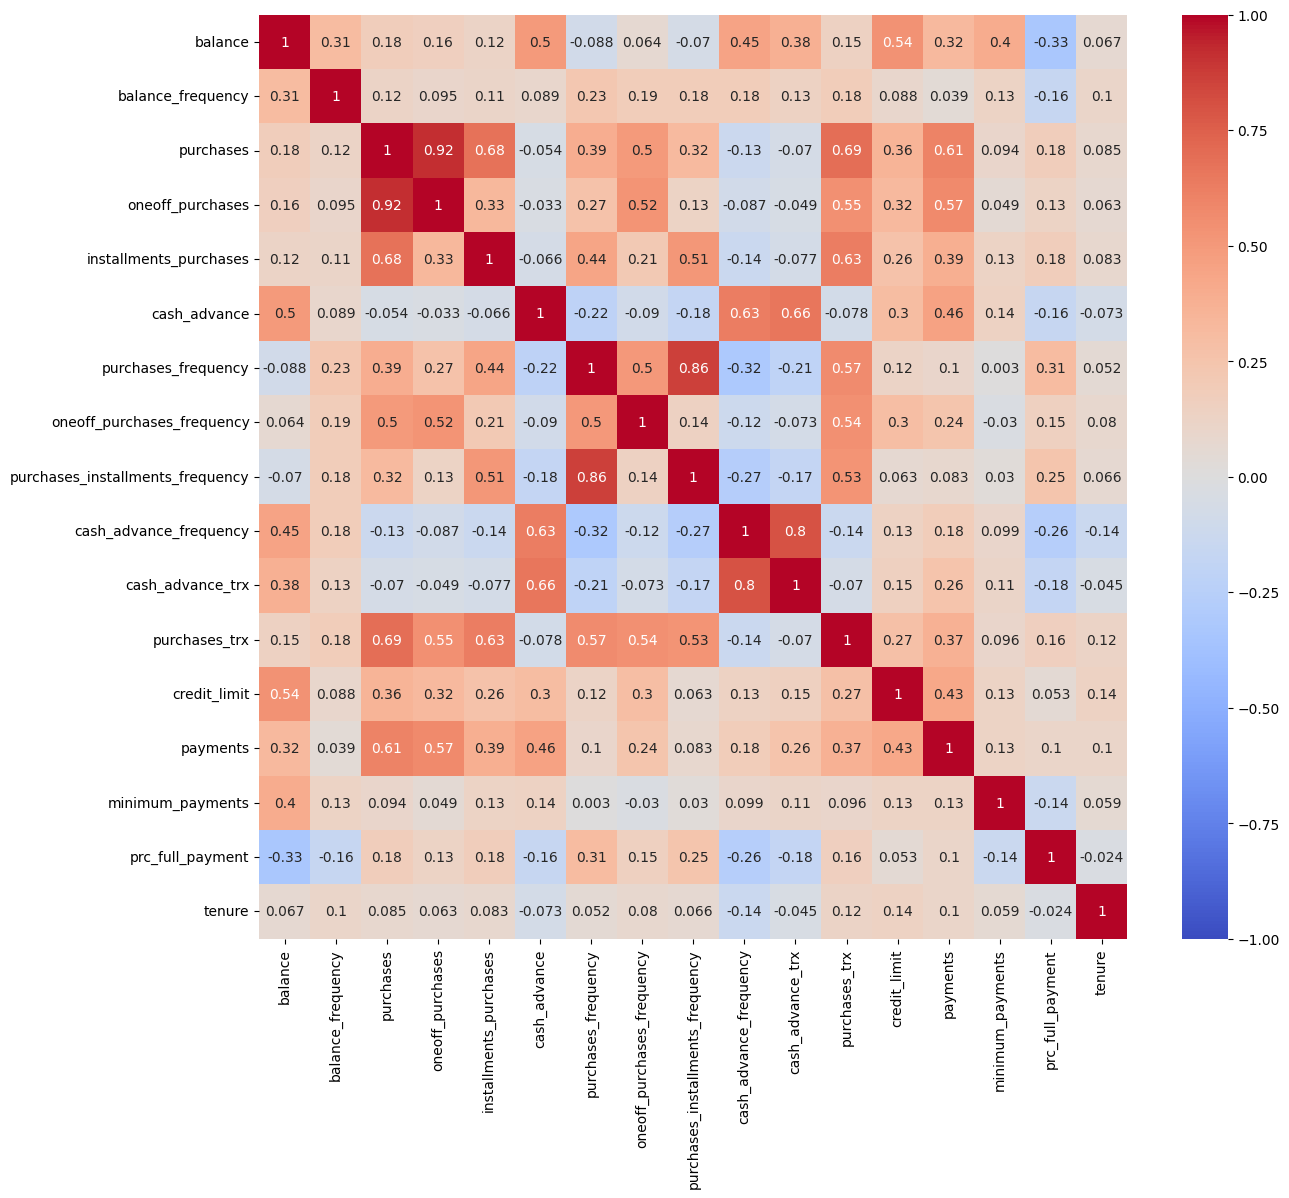

In [1148]:
#Correlation Matrix to see potential correlations with each other

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin =-1, vmax =1, cmap='coolwarm')
plt.show()

It seems multiple varaibles are moderately to highly correlated with each other. Dimensionality reduction or PCA may be effective in reducing complexity and redundance within our dataset.

Things to explore about the dataset.

We can observe correlation between:

Purchases
- One-Off purchases (Almost perfectly correlated)
    - May be due to multiple cardholders only making one purchase throughout the entire 6 months
- Installments_Purchases
    - There may be cardholders who's only made one purchase and it is also an installment purchase as well
- Purchase Installments Frequency
- PurchaseTrx


Frequency Variables
- Find out how many purchases allow the classification of a cardholder having a frequency score of 1
- Anything involving both # of transactions/ frequency of transactions and the actual frequency value are highly correlated with each other

Purchase Frequency
- Purchasetrx and purchase frequency is highly correlated



In [1149]:
df['tenure'].value_counts().reset_index()

,tenure,count
0,12,7346
1,11,356
2,10,226
3,6,184
4,8,183
5,7,177
6,9,164


In [1150]:
#Tenure column have 7 unique values ranging from 6-12

#Change these variables to 12 representing new customers having the credit card for under a month (Tenure by Months)
#12 = 6 months 
#11 = 5 months
#10 = 4 months
#9 = 3 months
#8 = 2 months
#7 = 1 months
#6 = 0 months

tenure_mapping = {
    12: 6,
    11: 5,
    10: 4,
    9: 3,
    8: 2,
    7: 1,
    6: 0
}

df['tenure'] = df['tenure'].replace(tenure_mapping)

df['tenure'].value_counts().reset_index()

,tenure,count
0,6,7346
1,5,356
2,4,226
3,0,184
4,2,183
5,1,177
6,3,164


In [1151]:
df['balance'].describe()

count     8636.000000
mean      1601.224893
std       2095.571300
min          0.000000
25%        148.095189
50%        916.855459
75%       2105.195853
max      19043.138560
Name: balance, dtype: float64

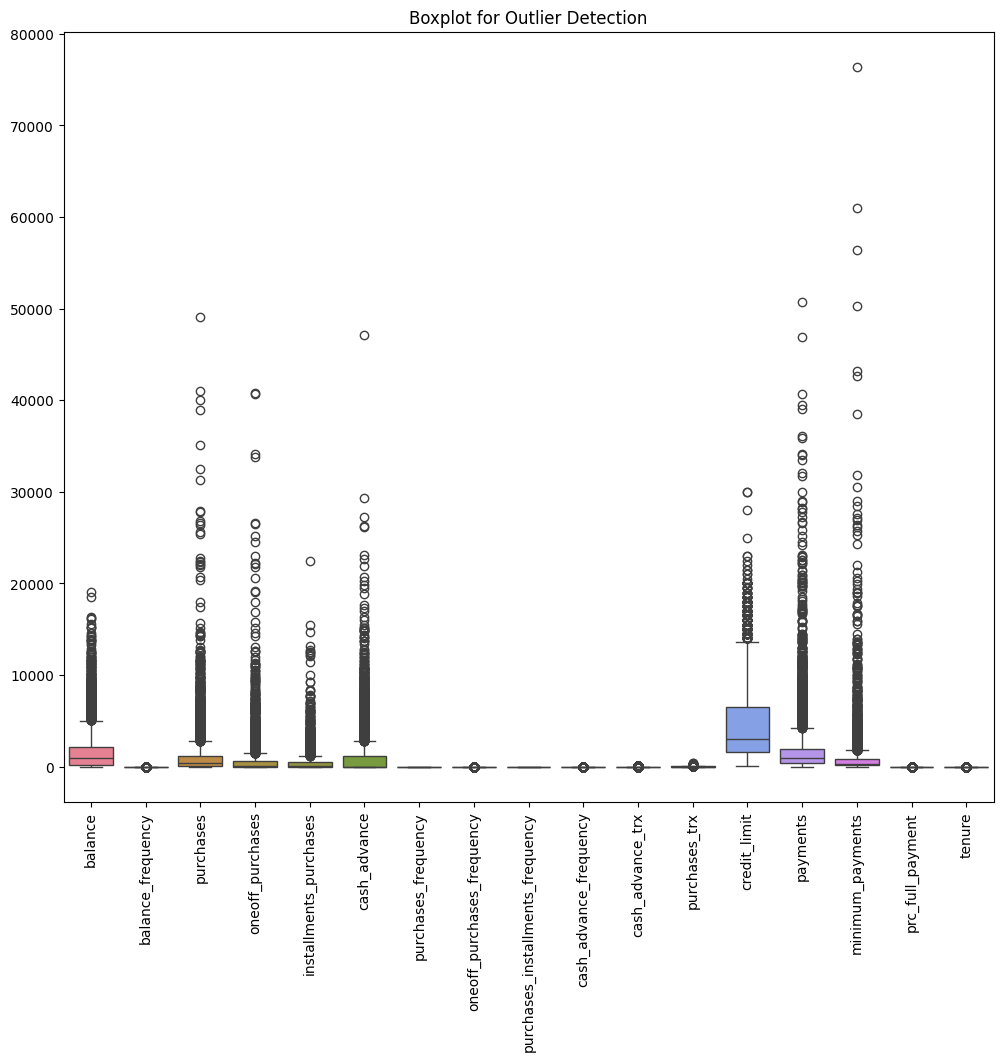

In [1152]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [1153]:
df[df['minimum_payments'] > 35000]

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
567,3457.086184,1.0,2448.60,0.0,2448.60,0.000000,1.0,0.0,1.0,0.000000,0,12,1700.0,227.514473,38512.12477,0.0,6
4376,10571.411070,1.0,7739.48,0.0,7739.48,0.000000,1.0,0.0,1.0,0.000000,0,44,8000.0,2688.447014,76406.20752,0.0,6
4462,4976.028578,1.0,900.87,0.0,900.87,0.000000,1.0,0.0,1.0,0.000000,0,162,5500.0,92.865469,50260.75947,0.0,6
5657,4628.109931,1.0,912.54,0.0,912.54,0.000000,1.0,0.0,1.0,0.000000,0,21,5000.0,3746.305759,56370.04117,0.0,6
5830,8038.893195,1.0,0.00,0.0,0.00,197.915586,0.0,0.0,0.0,0.166667,8,0,9000.0,3569.182969,43132.72823,0.0,6
5968,6022.224462,1.0,0.00,0.0,0.00,4111.465632,0.0,0.0,0.0,0.166667,6,0,7000.0,4560.775720,42629.55117,0.0,6
7132,9024.812044,1.0,0.00,0.0,0.00,2750.442399,0.0,0.0,0.0,0.083333,2,0,9000.0,302.484224,61031.61860,0.0,6


In [1154]:
# Step 2: Winsorize to cap extreme values
df['purchases'] = np.clip(df['purchases'], None, 10000)
df['balance'] = np.clip(df['balance'], None, 15000)
df['cash_advance'] = np.clip(df['cash_advance'], None, 25000)
df['payments'] = np.clip(df['payments'], None, 30000)
df['minimum_payments'] = np.clip(df['minimum_payments'], None, 35000)

Standardize

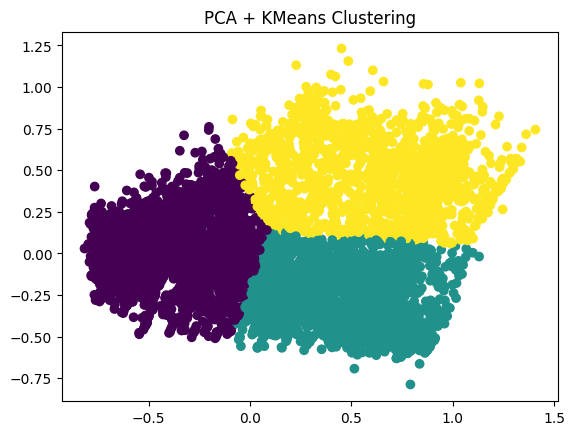

In [1155]:
# Scale the data to handle the further outliers
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # Choose number of components based on explained variance
df_pca = pca.fit_transform(df_scaled)

# Apply Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Visualize Clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters)
plt.title('PCA + KMeans Clustering')
plt.show()

In [1156]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1599.787945,0.895035,965.454301,604.901438,420.843533,990.565222,0.496000,0.205909,0.368820,0.137426,3.313918,15.033233,4522.091030,1773.585930,850.022517,0.159304,5.534391
std,2085.430994,0.207697,1593.516920,1684.307803,917.245182,2065.763214,0.401273,0.300054,0.398093,0.200905,6.912506,25.180468,3659.240379,2778.857830,2069.048159,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,0.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,6.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,6.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,6.000000
max,15000.000000,1.000000,10000.000000,40761.250000,22500.000000,25000.000000,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,30000.000000,35000.000000,1.000000,6.000000


## Part 2 - Exploratory Data Analysis

Looking to discover the types of outliers and potential credit card customer behaviours we can segment

    - Behaviours to focus on:
        ○ Transaction Amounts (Purchases Column)
        ○ Credit Limit Usage (Credit Utilization rate of the customers)
        ○ Spending Frequency (Purchasing frequency)
        - Repayment Behaviours (Customers who never make payments or always pay in full)

In [1157]:
df

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,6
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,6
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,6
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,6
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,0
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,0


## Scaled Visualization

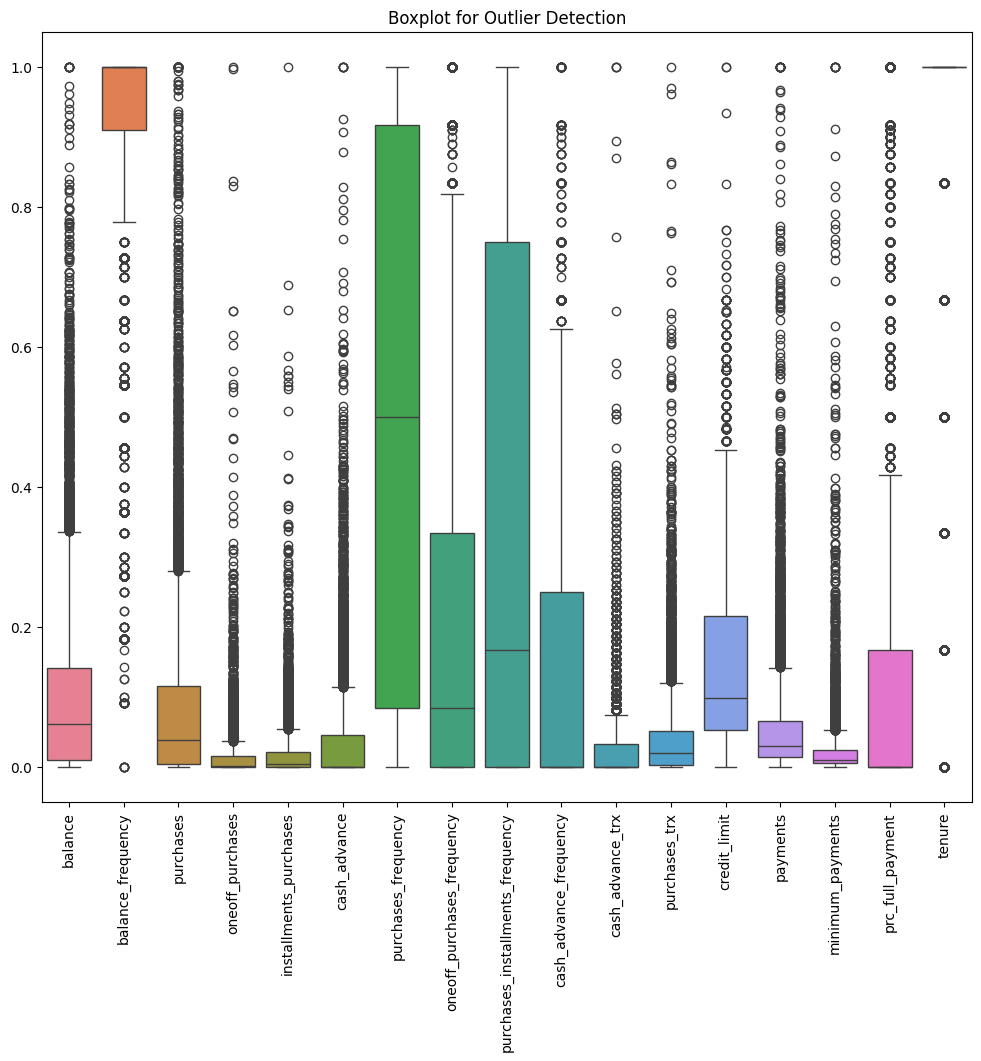

In [1158]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_scaled)
plt.xticks(ticks=range(len(df.columns)), labels=df.columns, rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


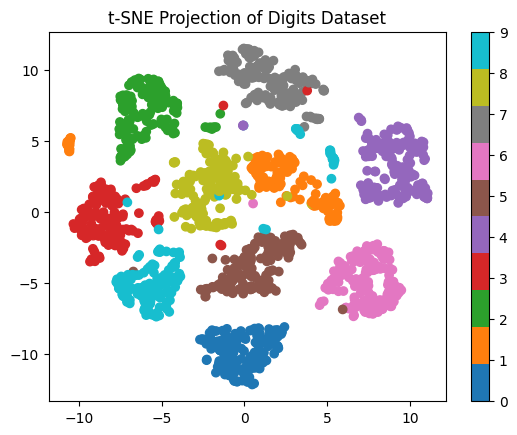

In [1159]:
##Testing t-SNE if the dataset is non-linear... looks like they are more clearly defined ***

# Load a dataset (e.g., digits)
digits = load_digits()
X = digits.data
y = digits.target

# Fit t-SNE model
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE projection
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10')
plt.colorbar()
plt.title('t-SNE Projection of Digits Dataset')
plt.show()

Going to try to normalize the outliers in the dataset through feature scaling and winsorization

In [1160]:
#Analyzing the Outliers for some columns

#Looks like those those who have puchased a minimum total amount of $10,000 throughout their tenure represents only 0.7% of the distribution
#These are not normal credit card customer behaviours, should be treated as anomolies

df[df['purchases'] > 10000]

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure


In [1161]:
df[df['balance'] > 15000]

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure


In [1162]:
df[df['cash_advance'] > 25000]

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure


<Axes: xlabel='balance', ylabel='payments'>

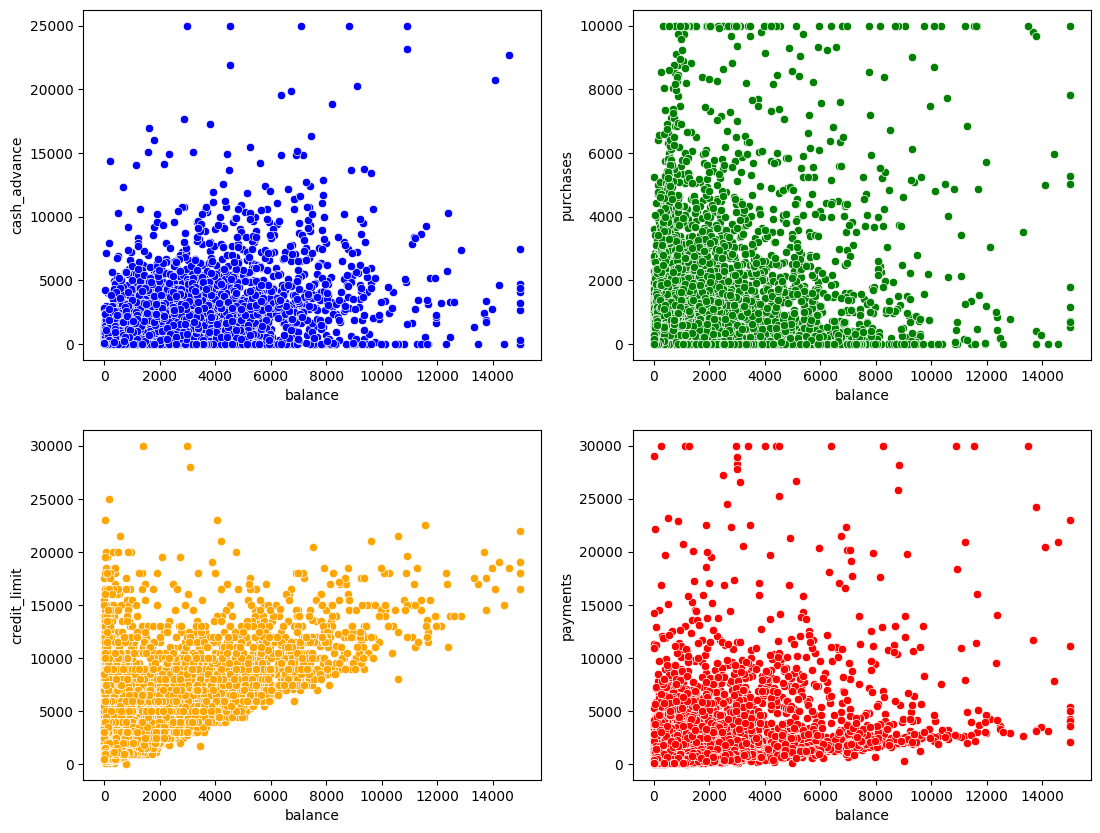

In [1163]:
#Checking the relationship between balance and other variables - Outliers have been standardized to have less of an impact for the model building

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(13,10))
axes = axes.flatten()

sns.scatterplot(x=df['balance'], y=df['cash_advance'], ax=ax1, color='blue')
sns.scatterplot(x=df['balance'], y=df['purchases'], ax=ax2, color='green')
sns.scatterplot(x=df['balance'], y=df['credit_limit'], ax=ax3, color='orange')
sns.scatterplot(x=df['balance'], y=df['payments'], ax=ax4, color='red')


<Axes: xlabel='prc_full_payment', ylabel='Count'>

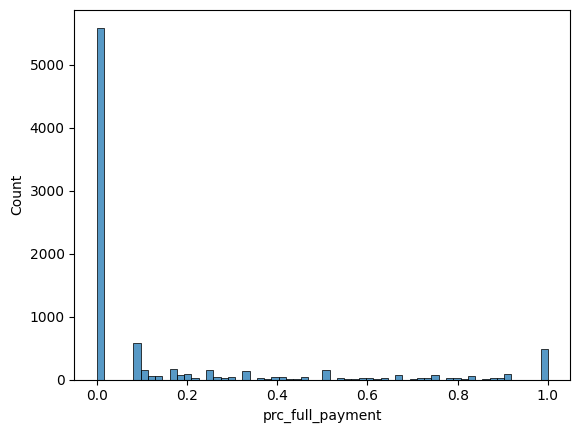

In [1164]:
sns.histplot(df['prc_full_payment'])

In [1165]:
df[(df['cash_advance_frequency'] == 0.1) & (df['cash_advance'] > 0)]

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
731,4834.586867,1.0,0.00,0.00,0.00,56.747353,0.0,0.0,0.0,0.1,1,0,5500.0,874.365824,1582.515056,0.000000,4
937,4593.577983,1.0,0.00,0.00,0.00,393.742621,0.0,0.0,0.0,0.1,1,0,5250.0,1064.913240,1558.017969,0.000000,4
1152,645.299519,1.0,1310.84,690.00,620.84,76.361029,0.8,0.2,0.6,0.1,1,12,2500.0,1402.760660,158.916575,0.000000,4
1171,6306.501319,1.0,205.03,0.00,205.03,270.445198,0.3,0.0,0.3,0.1,1,3,14000.0,1646.635328,1705.819755,0.000000,4
1266,173.940108,0.5,958.50,958.50,0.00,404.991463,0.3,0.3,0.0,0.1,2,6,16000.0,3213.848412,76.806928,1.000000,4
1580,0.126562,0.2,0.00,0.00,0.00,47.222001,0.0,0.0,0.0,0.1,1,0,1200.0,119.790593,7.127887,0.500000,4
1733,10.118033,0.1,0.00,0.00,0.00,197.521871,0.0,0.0,0.0,0.1,1,0,1500.0,648.301187,148.644436,0.000000,4
1846,86.694598,0.5,0.00,0.00,0.00,465.455995,0.0,0.0,0.0,0.1,1,0,1500.0,543.829920,64.977254,0.000000,4
1866,1199.555426,0.5,0.00,0.00,0.00,2831.836214,0.0,0.0,0.0,0.1,2,0,3000.0,707.767429,637.975920,0.000000,4
2573,2048.834742,1.0,3342.90,1907.90,1435.00,436.158090,1.0,0.3,0.9,0.1,5,45,2500.0,1685.441335,2766.440973,0.000000,4


<Axes: xlabel='tenure', ylabel='Count'>

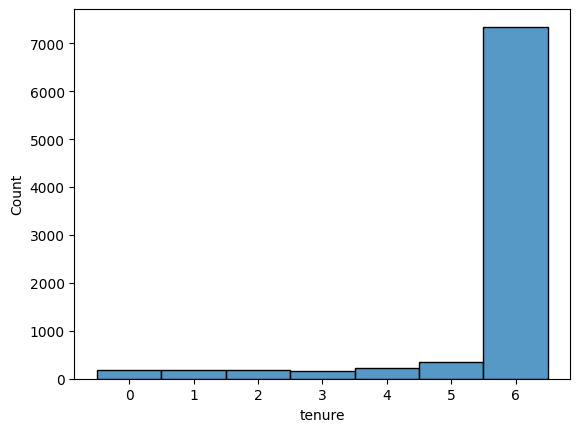

In [1166]:
#Distribution of users by Tenure... Majority of them are tenured past the 6 month time frame

sns.histplot(df['tenure'], bins=7, discrete=True)

<Axes: xlabel='balance', ylabel='Count'>

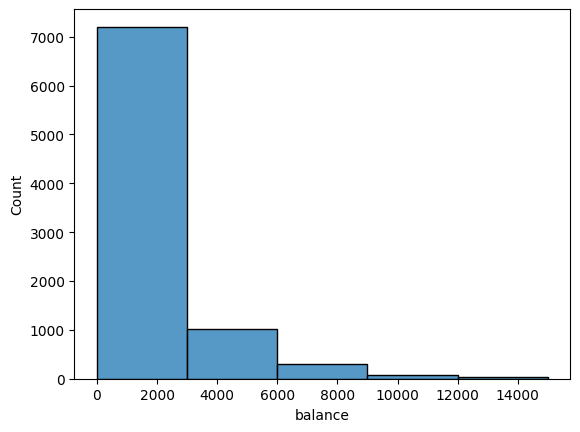

In [1167]:
#Distribution of credit card user's balance they have when data was obtained

sns.histplot(x=df['balance'], bins=5)

<Axes: xlabel='purchases', ylabel='Count'>

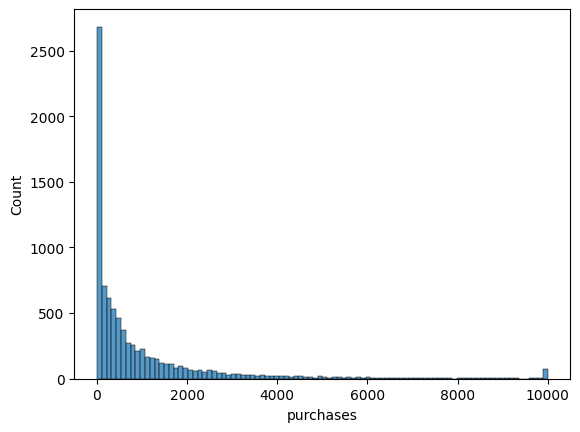

In [1168]:
#This needs to be scaled for the outliers
sns.histplot(x=df['purchases'])

<Axes: ylabel='purchases'>

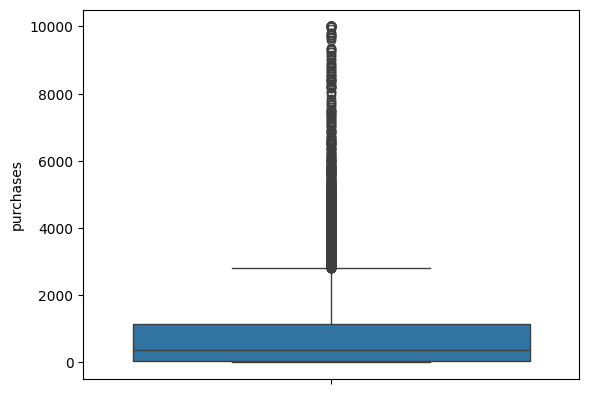

In [1169]:
#Theres alot of outliers for this column

sns.boxplot(df['purchases'])

In [1170]:
#Box Plots for all the transaction amounts

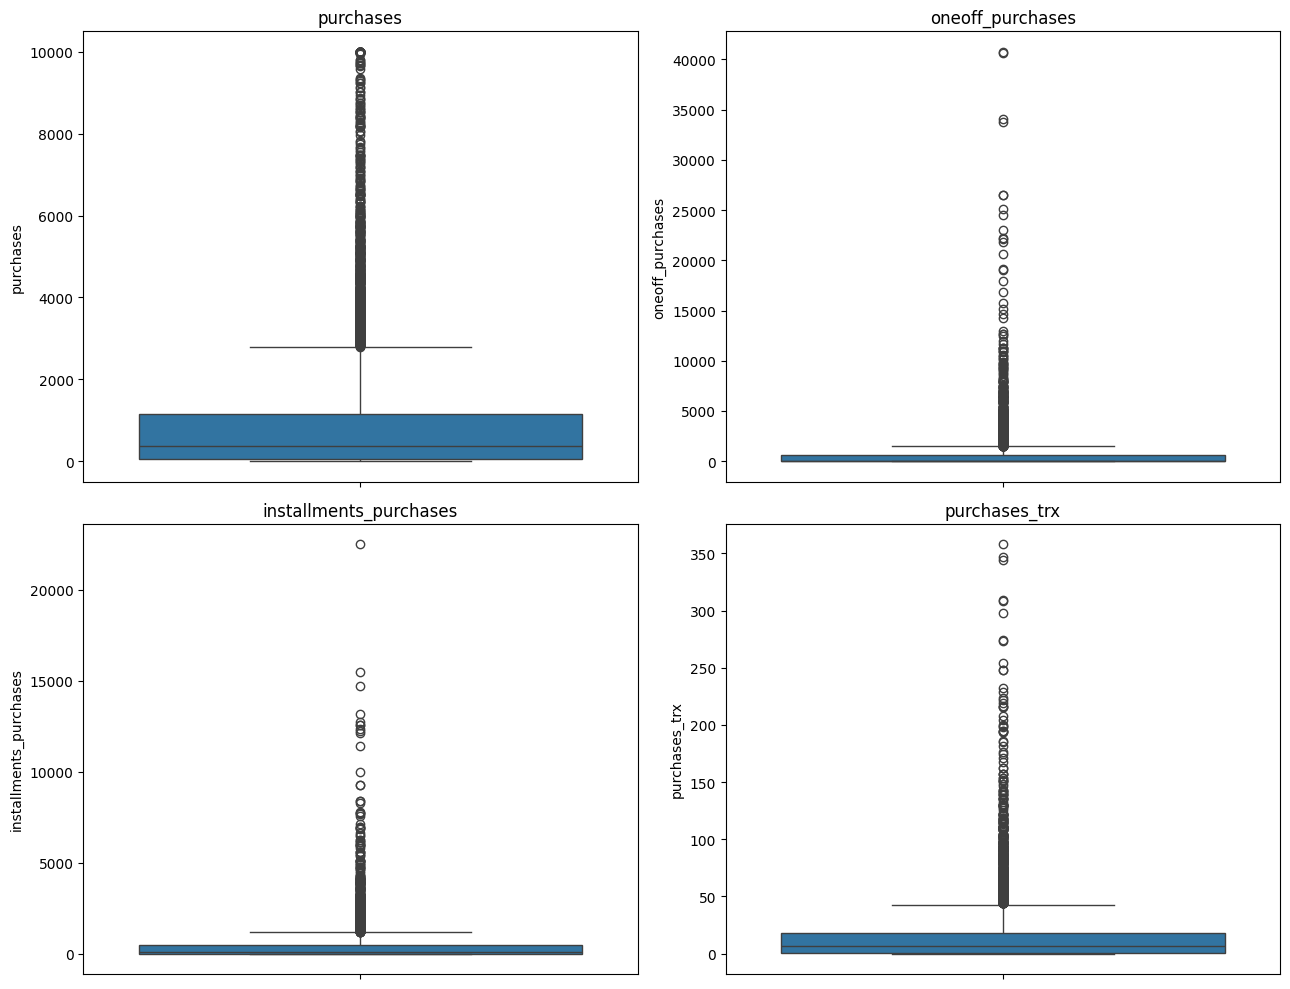

In [1172]:

# Boxplot of all the purchase types - There are a lot of outliers for all the purchase types
purchases_df = pd.DataFrame()

# Select columns with 'purchases' in their name but not 'frequency'
for col in df.columns:
    if 'purchases' in col.lower() and 'frequency' not in col.lower():
        purchases_df[col] = df[col]

# Calculate the number of columns
num_cols = len(purchases_df.columns)

# Dynamically calculate rows and columns for subplots
rows = (num_cols // 2) + (num_cols % 2)  # For two plots per row
fig, axes = plt.subplots(rows, 2, figsize=(13, 10))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through columns and create a boxplot for each
for i, col in enumerate(purchases_df.columns):
    sns.boxplot(data=purchases_df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

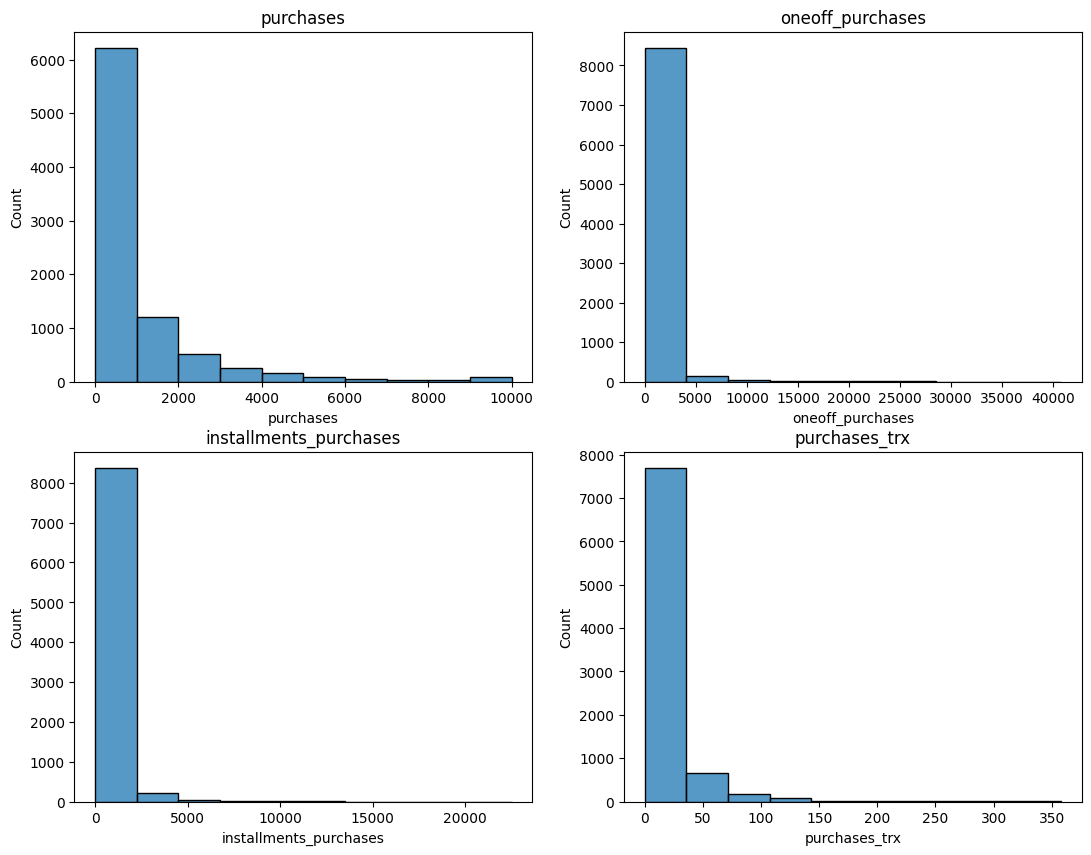

In [1173]:
#Histplots for the purchases

fig, axes = plt.subplots(2,2, figsize=(13,10))
axes = axes.flatten()

for i, col in enumerate(purchases_df.columns):
    sns.histplot(data=purchases_df[col], ax=axes[i], bins=10)
    axes[i].set_title(col)

plt.show()

<Axes: xlabel='purchases', ylabel='payments'>

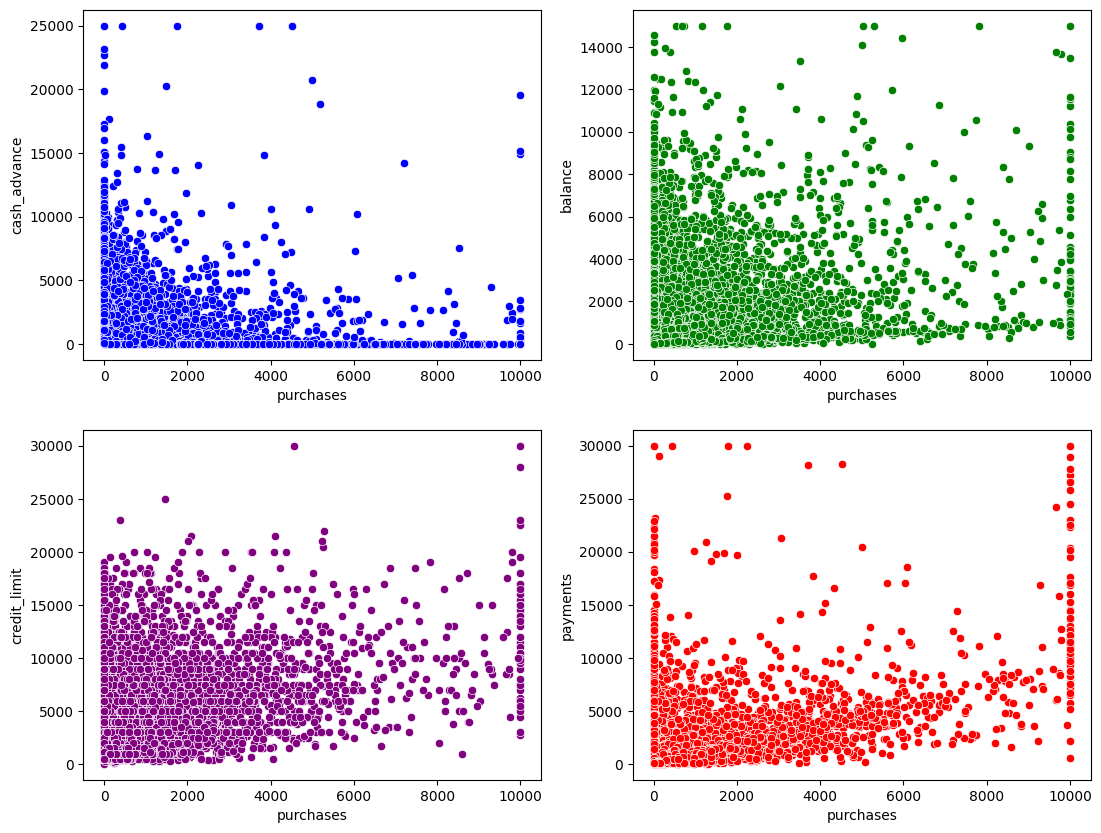

In [1174]:
#Plotting purchases with other variables - see all the outliers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(13,10))
axes = axes.flatten()

sns.scatterplot(x=df['purchases'], y=df['cash_advance'], ax=ax1, color='blue')
sns.scatterplot(x=df['purchases'], y=df['balance'], ax=ax2, color='green')
sns.scatterplot(x=df['purchases'], y=df['credit_limit'], ax=ax3, color='purple')
sns.scatterplot(x=df['purchases'], y=df['payments'], ax=ax4, color='red')

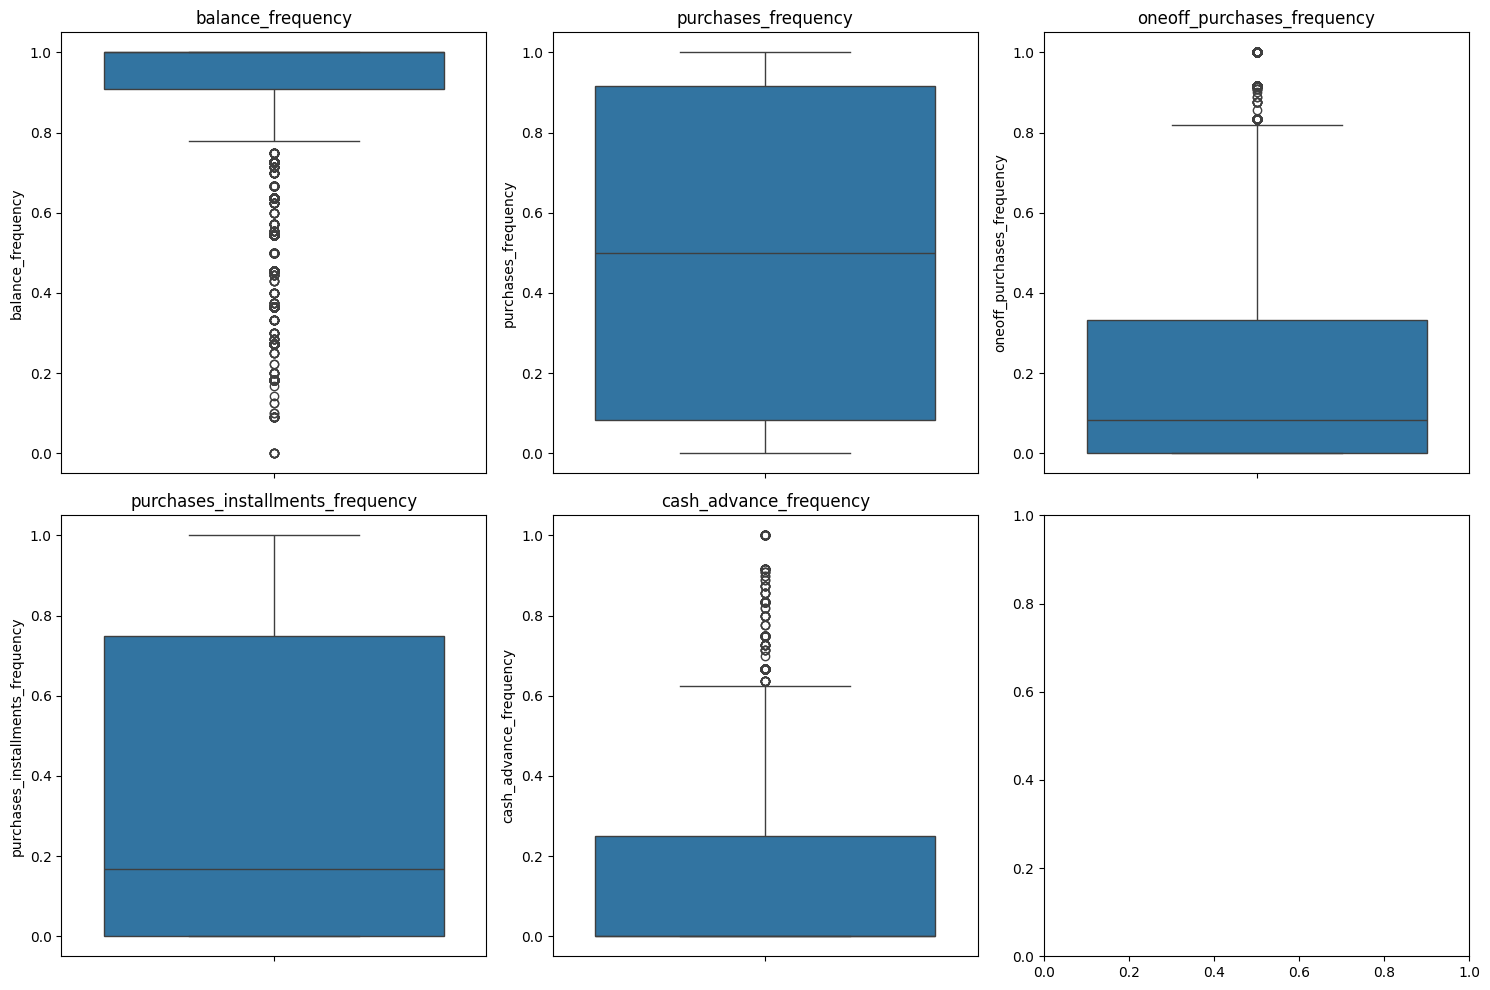

In [1175]:
# Create a grid of box plots for frequency columns for potential patterns

freq_df = pd.DataFrame()

for col in df.columns:
    if 'frequency' in col.lower():
        freq_df[col] = df[col]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the grid size (2, 3) based on the number of columns
axes = axes.flatten()

# Plot boxplots for each frequency column
for i, col in enumerate(freq_df.columns):
    sns.boxplot(data=freq_df[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust the layout
plt.tight_layout()
plt.show()

Theres alot of outliers for the frequencies

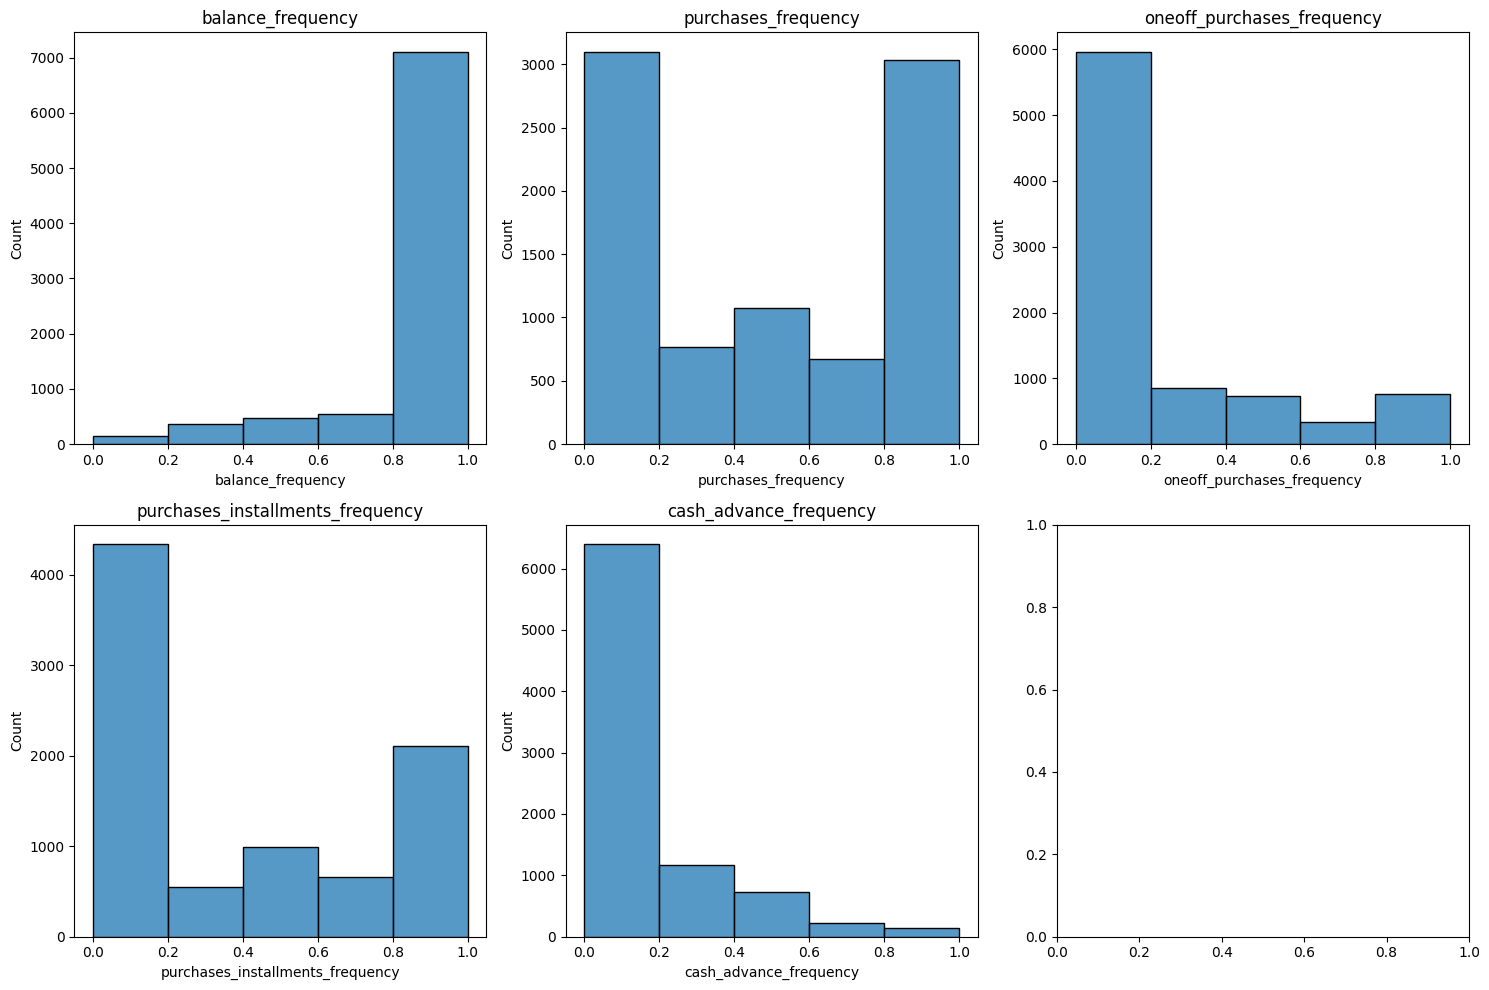

In [1176]:
# Create a grid of box plots for frequency columns for potential patterns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the grid size (2, 3) based on the number of columns
axes = axes.flatten()

# Plot boxplots for each frequency column
for i, col in enumerate(freq_df.columns):
    sns.histplot(data=freq_df[col], ax=axes[i], bins=5)
    axes[i].set_title(col)

# Adjust the layout
plt.tight_layout()
plt.show()

It seems from the hist plots, majority of the frequency variables have credit card customers who are infrequent users for Oneoff purchases and purchase installments

In [1177]:
#Lets try winsorize the data

# 1. Winsorization (Cap the extreme values)
# Define the capping limits
purchases_cap = 10000
balance_cap = 15000
cash_advance_cap = 25000

# Apply the caps using np.clip
df['purchases'] = np.clip(df['purchases'], None, purchases_cap)
df['balance'] = np.clip(df['balance'], None, balance_cap)
df['cash_advance'] = np.clip(df['cash_advance'], None, cash_advance_cap)

# 2. Feature Scaling (Normalize features between 0 and 1)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 3. Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)  # Reducing to 2 dimensions for visualization
tsne_results = tsne.fit_transform(df_scaled)

# Convert t-SNE results into a DataFrame for easier plotting
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])






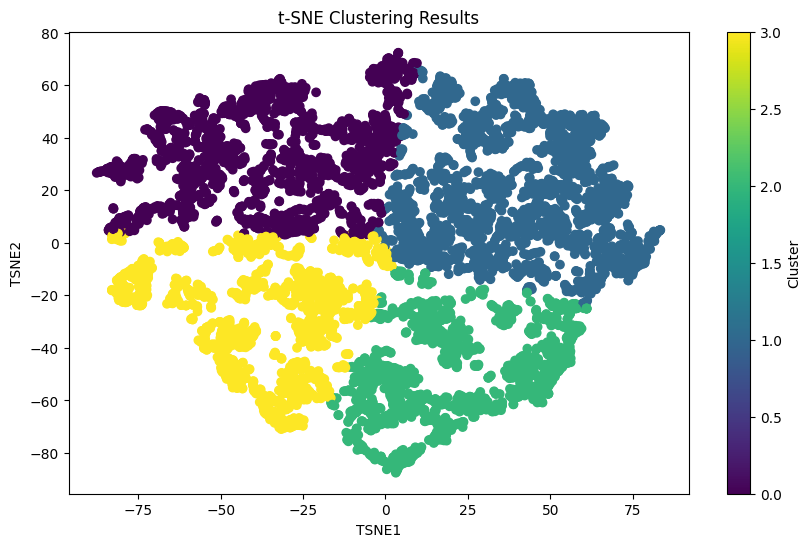

In [1178]:
# 4. Clustering using KMeans on the t-SNE transformed data
kmeans = KMeans(n_clusters=4, random_state=42)  # Assuming 3 clusters
df_tsne['cluster'] = kmeans.fit_predict(df_tsne)

# 5. Visualization of the t-SNE results with clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['cluster'], cmap='viridis')
plt.title('t-SNE Clustering Results')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar(label='Cluster')
plt.show()

## Part 3 - Cluster Model Building 